# Part II - Ford GoBike System Dataset Analysis
## by Abderrahmen Mansour

## Investigation Overview


In this analysis, I focused on several variables that can affect the frequency of trips: Day of week and hour of day, and how the duration of each trip can vary by user types, day of week, and hour of day. In addition, I analyzed User types by distance /duration of trip, and age of user.

## Dataset Overview

The dataset contains ride data information for about 183,000 rides in the Ford GoBike system covering the greater San Francisco Bay area, with variables including user behavior (duration, date-time, station location) and demographic information (user type, gender, age).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
Bike_clean = pd.read_csv("Cleaned_Data.csv")

## Trip distribution by day of the week and hour
**On what day of the week is there the most traffic?**
> * During the weekdays, the number of trips does not differ significantly, about 27.500 trips per day.
> * At weekends, the number of trips decreases by about 50%, i.e. 14.000 trips per day.

**During which time of day is there the most traffic?**
> * The highest traffic volume occurs between 7 and 9 a.m. and between 4 and 6 p.m.
> * Between 10 a.m. and 3 p.m., the hourly traffic volume is about 7,500.
> * Before 7 a.m. and after 6 p.m., the number of trips decreases sharply.
> * During the midnight hours (1-5 a.m.), only a few people ride GoBike.


In [3]:
#First transform ordinal objects into the appropriate form
var_dict = {'user_type': ['Subscriber','Customer'],
            'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']} 
#              'bike_share_for_all_trip': ['No', 'Yes'],
#              'start_time(hr)': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
#                             '18', '19', '20', '21', '22', '23'],
#              'end_time(hr)': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
#                             '18', '19', '20', '21', '22', '23']}
for v in var_dict:
    ordered_v = pd.api.types.CategoricalDtype(ordered = True, categories= var_dict[v])
    Bike_clean[v] = Bike_clean[v].astype(ordered_v)

In [4]:
#Outlier 
high_outliers = (Bike_clean['duration_min'] > 67.5)
#proportion of outliers in Procent %
print(high_outliers.sum()/Bike_clean['duration_min'].sum()*100)#proportion of outlier
# let's drop the Bike_clean['duration_min'] > 67.5
Bike_clean = Bike_clean.loc[-high_outliers] 

0.0


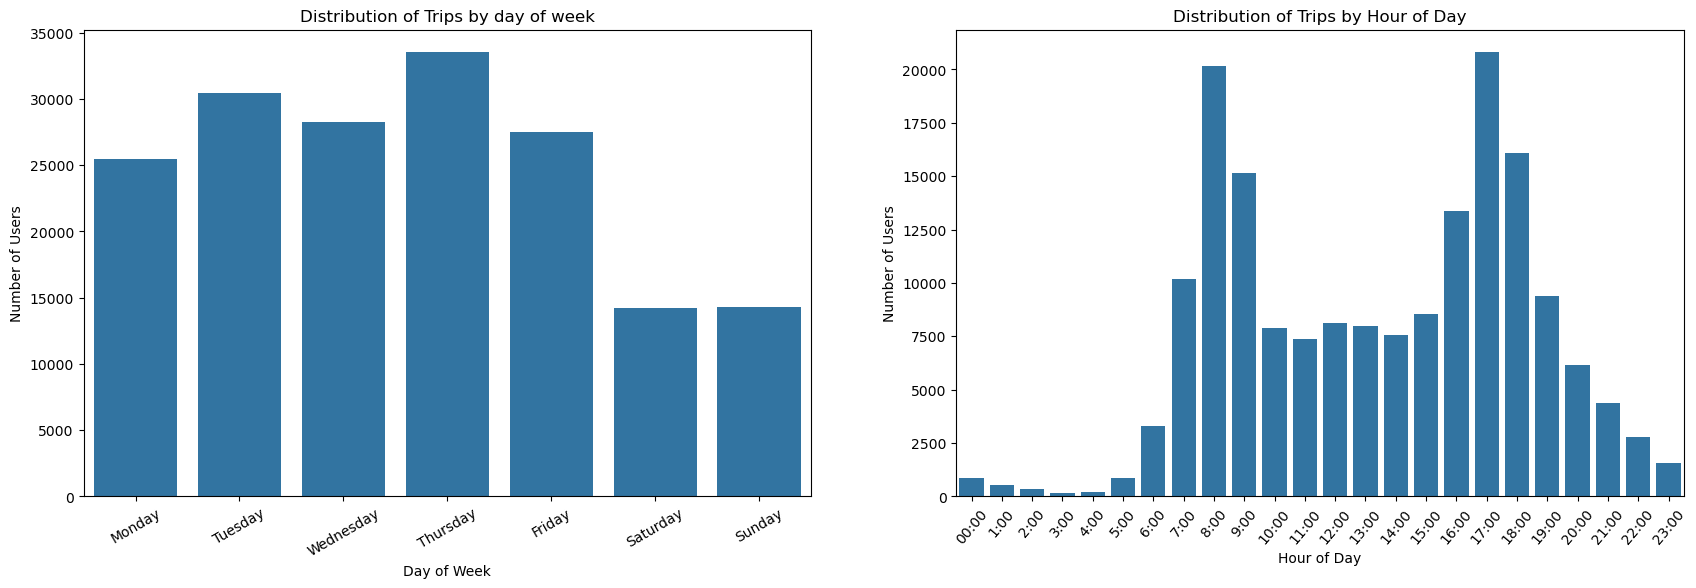

In [15]:
#to plot the three figures side by side
plt.figure(figsize = [20, 14])
color = sb.color_palette()[0]
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

#Distribution of start/end trips by day of the week
plt.subplot(2, 2, 1)
sb.countplot(data = Bike_clean, x ="start_day", color = color);
plt.xticks(rotation = 30)
plt.xlabel('Day of Week');
plt.ylabel('Number of Users');
plt.title('Distribution of Trips by day of week');

plt.subplot(2, 2, 2)
sb.countplot(data = Bike_clean, x = "start_time(hr)", color = color)
#setting customized ticklabels for x axis
labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
       '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
plt.xticks(range(24), labs, rotation = 50)
plt.xlabel('Hour of Day');
plt.ylabel('Number of Users');
plt.title('Distribution of Trips by Hour of Day');
plt.savefig("Images/Distribution of Trips by Hour of Day.jpg")

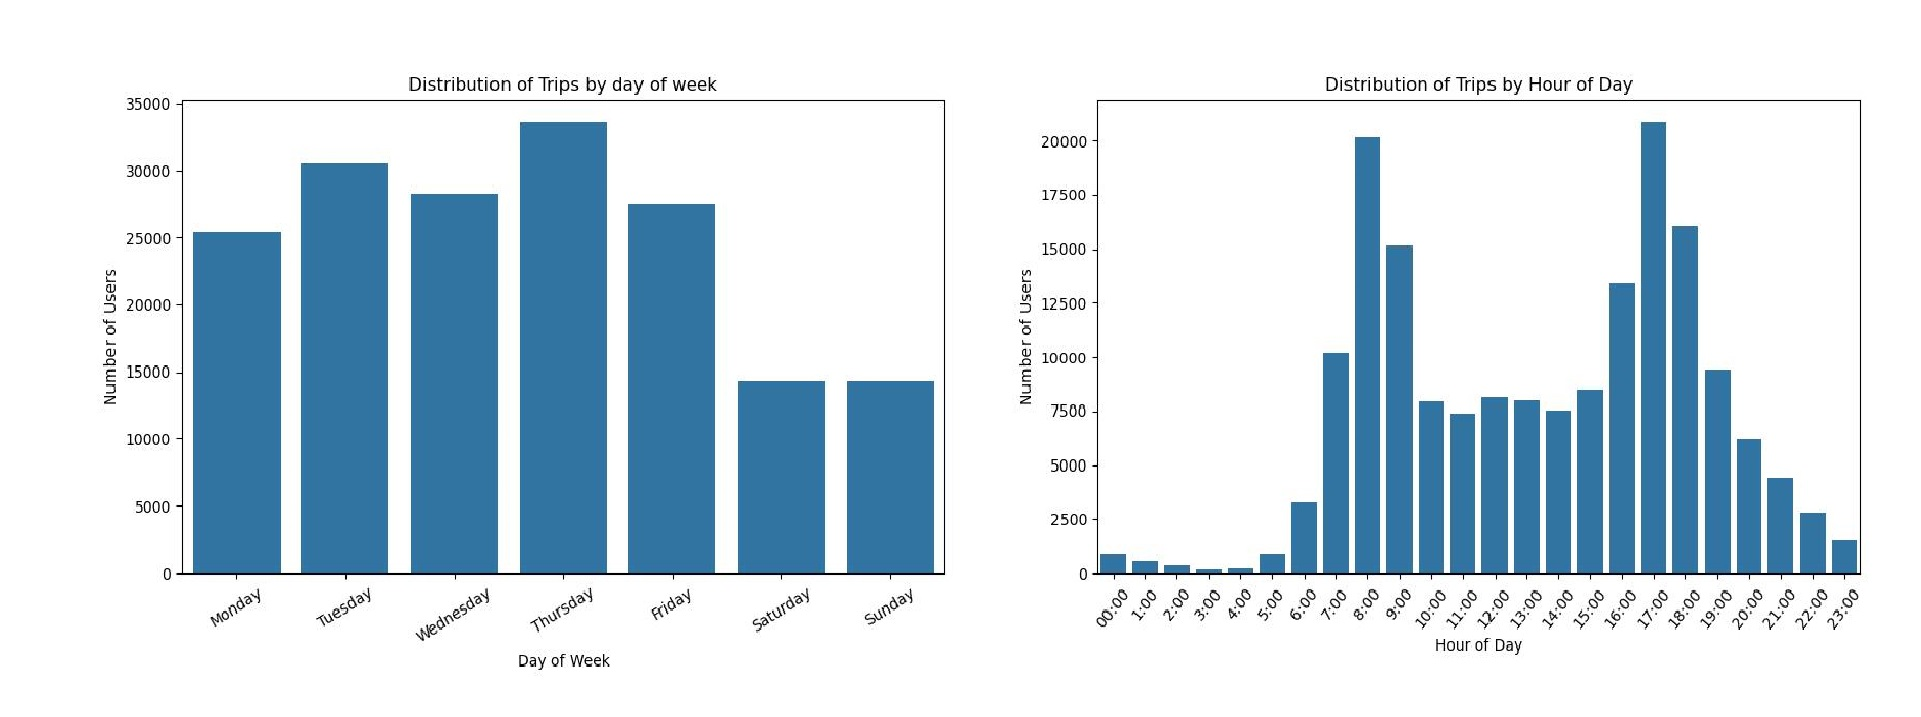

In [17]:
Bike_clean['start_time(hr)'] = Bike_clean['start_time(hr)'].astype(int)

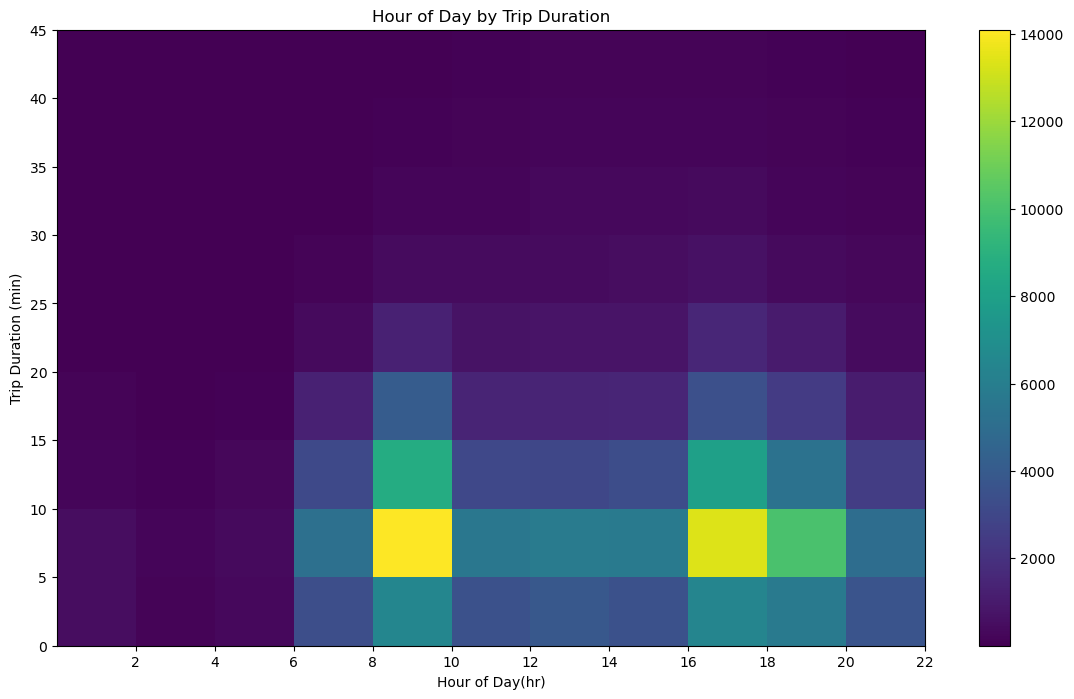

In [18]:
plt.figure(figsize = [14, 8])
bins_x = np.arange(0,24,2)
bins_y = np.arange(0,50,5)
plt.hist2d(data=Bike_clean, x = 'start_time(hr)', y = 'duration_min',cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Hour of Day(hr)')
plt.ylabel('Trip Duration (min)');
plt.title("Hour of Day by Trip Duration");
plt.xticks(np.arange(2, 24, 2));
plt.savefig("Images/Hour of Day by Trip Duration.jpg")

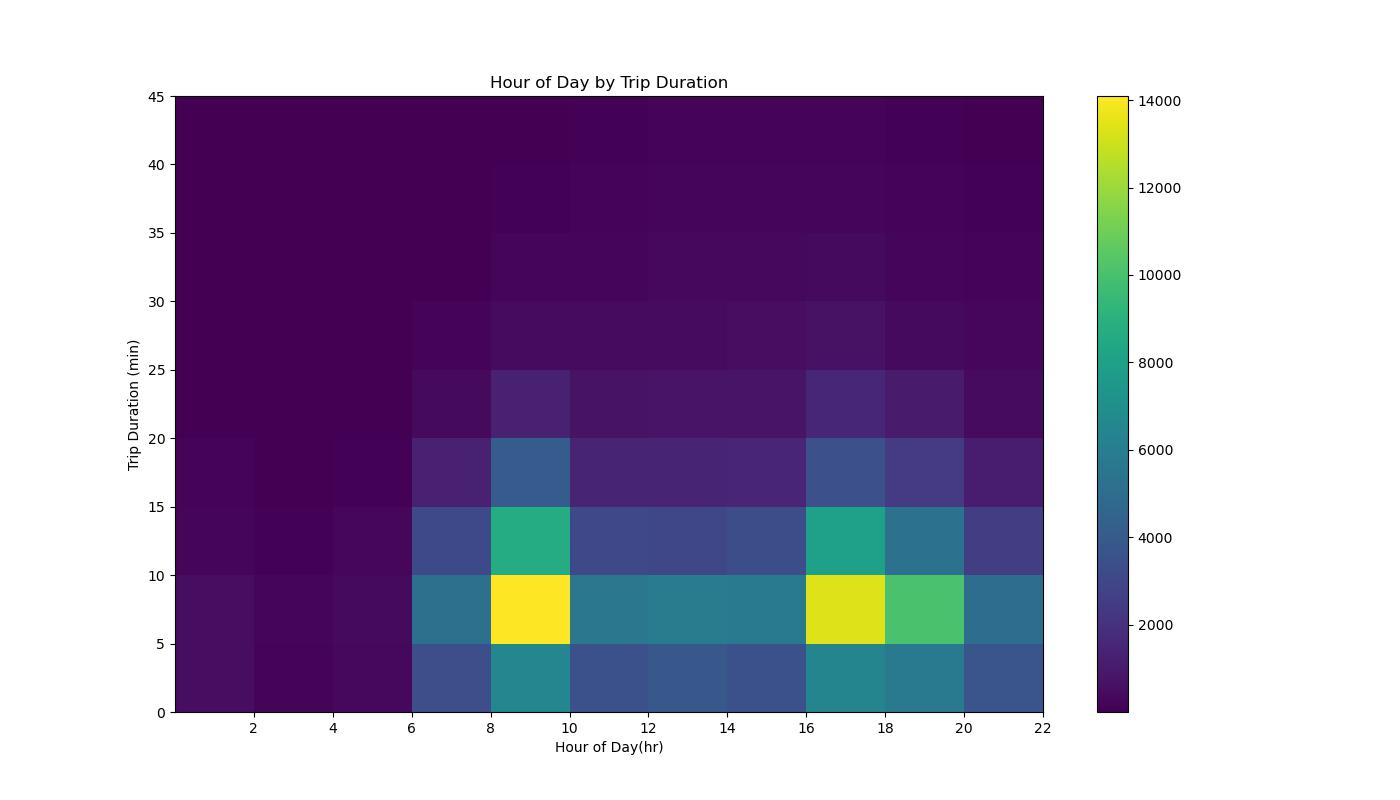

## Durations by day of the week per user type
**What is the usage behavior of the different user types?**
> * Subscriber usage time during the week does not change much on average.
> * On weekends, the duration of customers are higher than on weekdays.
> * On average, the duration of customers is higher than that of daily subscribers.

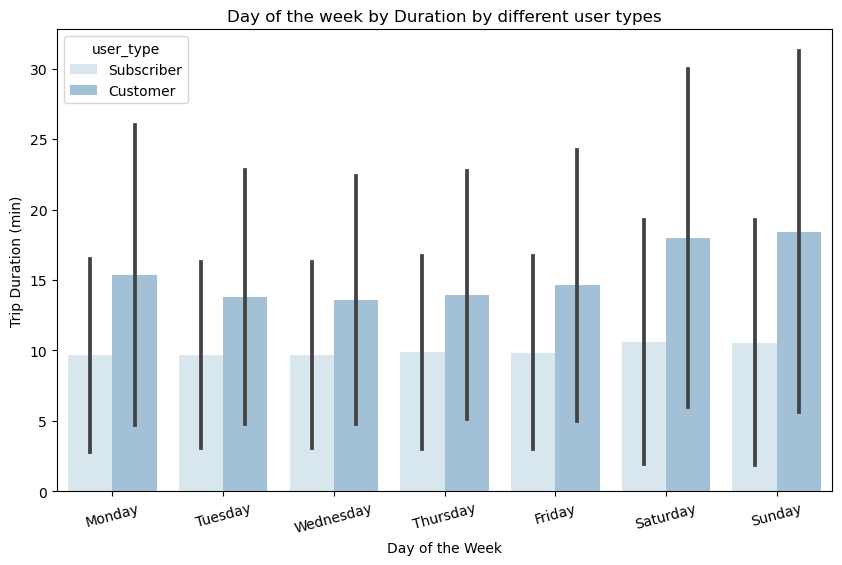

In [19]:
plt.figure(figsize = [10,6])
sb.barplot(data=Bike_clean, x='start_day', y='duration_min',hue = 'user_type', palette = 'Blues', ci='sd',alpha = 0.5)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week');
plt.ylabel('Trip Duration (min)');
plt.title("Day of the week by Duration by different user types");
plt.savefig("Images/Day of the week by Duration by different user types.jpg")

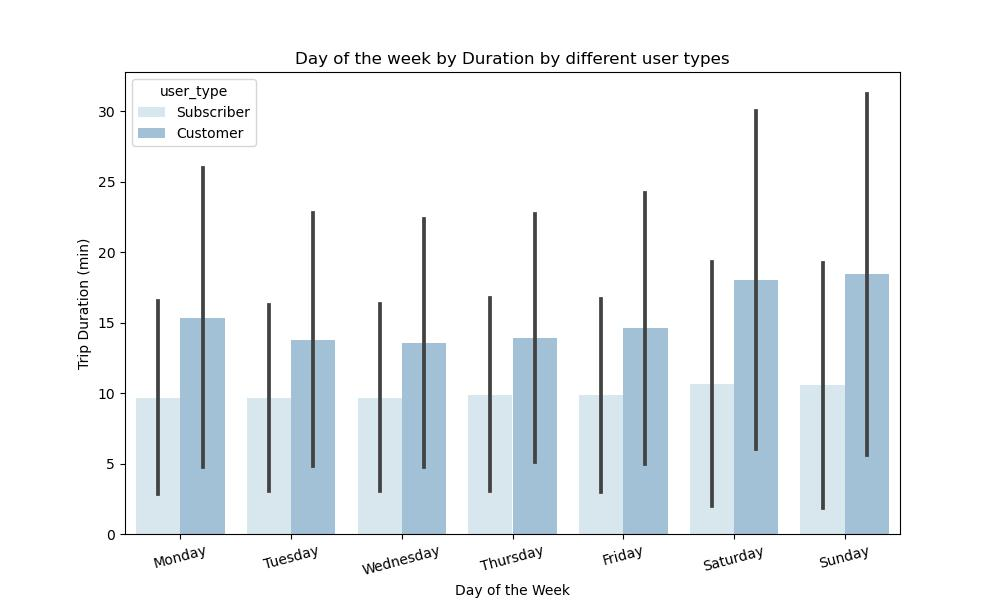

## Number of customers vs. Number of subscribers
**How are the user types distributed in percent ?**
> There are 9 times more subscribers than customers in the dataset.

In [20]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [21]:
#function to plot a piechart
def pie_Chart(values, labels, title, explode):
    
    explode = explode;
    plt.pie(values ,explode=explode,counterclock=False, shadow=False, autopct='%1.1f%%');
    plt.title(title);
    plt.legend(labels, loc='center left', bbox_to_anchor=(1.5, 0.5));
    plt.show();

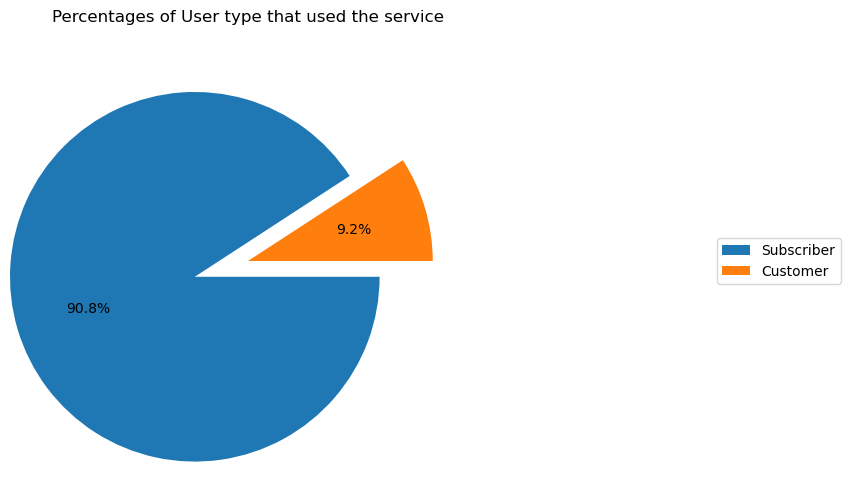

<Figure size 640x480 with 0 Axes>

In [27]:
#plot piechart of Most counted Distances in km using function
plt.figure(figsize = [8, 6])
sorted_user_type = Bike_clean.user_type.value_counts().sort_values(ascending=False)
title = 'Percentages of User type that used the service'
explode = (0.3, 0)
pie_Chart(sorted_user_type.values, sorted_user_type.index, title, explode)
plt.savefig("Images/Percentages of User Type that used the service.jpg");

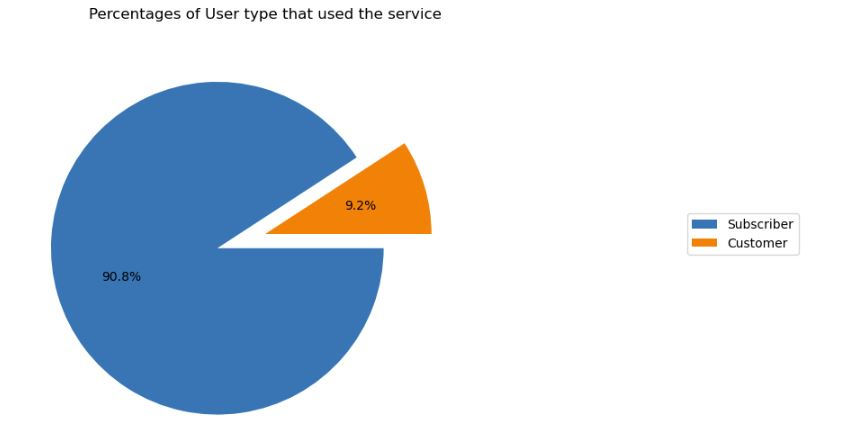

## Distance Cycled vs. type of Customer
**What is the impact of the traveled Distance on the User type ?**
> Subscribers tend to make short trips, while customers tend to make long trips.

Note: Outliers have been removed from this chart.

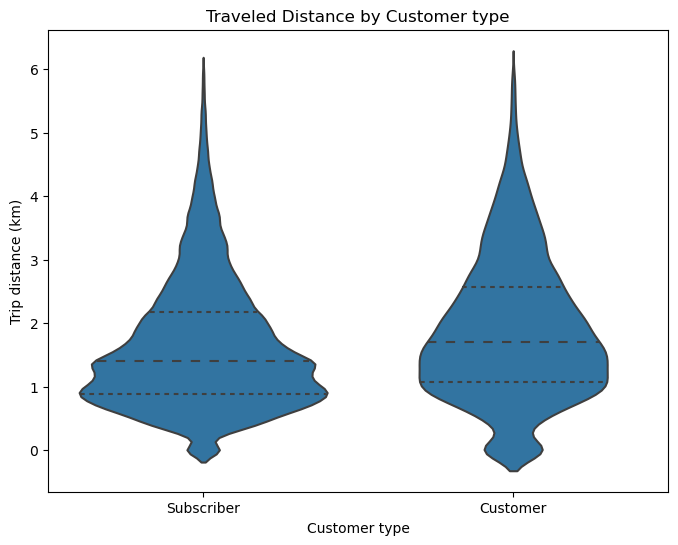

In [5]:
plt.figure(figsize = [8,6])
#show user type vs Distance in violin plot
sb.violinplot(data = Bike_clean.query("trip_km <= 6"),x = 'user_type',y='trip_km',color = sb.color_palette()[0],inner='quartile');
plt.title("Traveled Distance by Customer type");
plt.xlabel("Customer type");
plt.ylabel("Trip distance (km)");
plt.savefig("Images/Traveled Distance by Customer type.jpg");

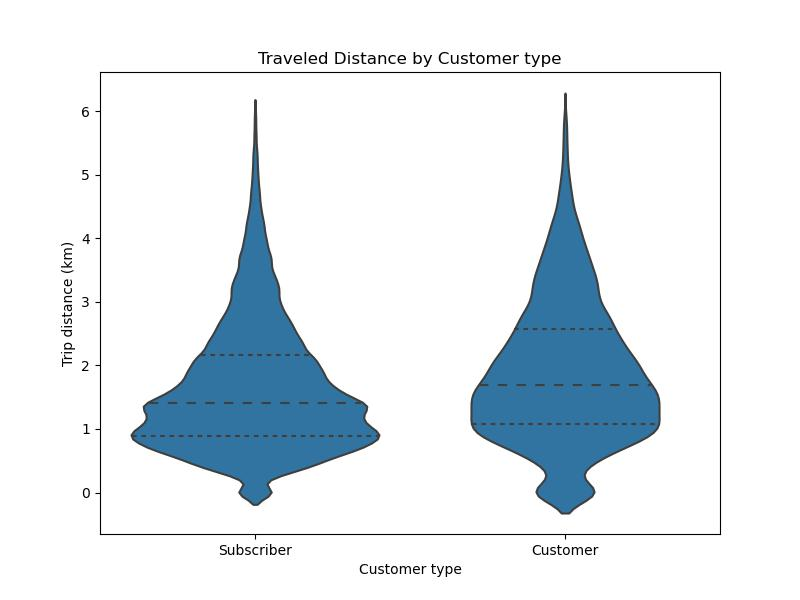

## Age vs. customer type
**What effect does the age of the users have on the different user types ?**

There is no significant correlation between age and customer type.

Note: Age axis ends at 80 years.

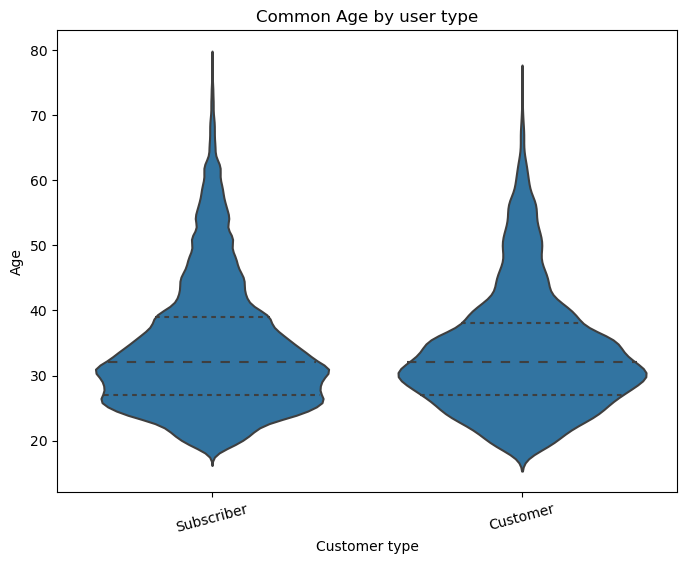

In [7]:
# show user type vs Age in boxplot
# plt.subplot(1,2, 1)
# sb.boxplot(data=Bike_clean, x='user_type', y='age', color=sb.color_palette()[0])
# plt.xlabel("Customer type");
# plt.ylabel("Age");
# plt.title("Common Age by user type");
# plt.xticks(rotation=15);

plt.figure(figsize = [8,6])
#show user type vs Age in violin plot
# plt.subplot(1,2, 2)
sb.violinplot(data = Bike_clean.query("age <= 79"),
               x = 'user_type',y='age',
               color = sb.color_palette()[0],inner='quartile');

plt.xlabel("Customer type");
plt.ylabel("Age");
plt.title("Common Age by user type");
plt.xticks(rotation=15);
plt.savefig("Images/Common Age by user type.jpg");

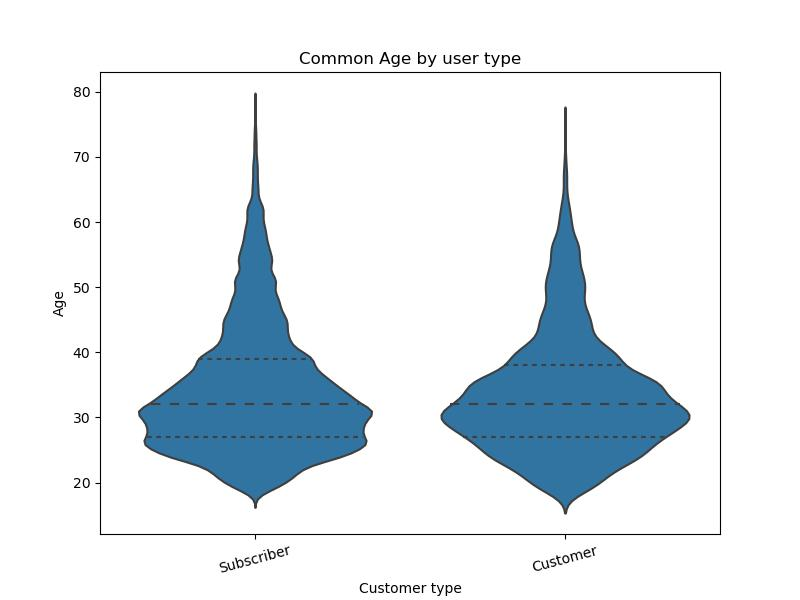

## Trip duration vs. Customer type
**What is the impact of the trip duration and on the User type ?**

Subscribers tend to travel for shorter durations, while customers tend to travel for longer durations.

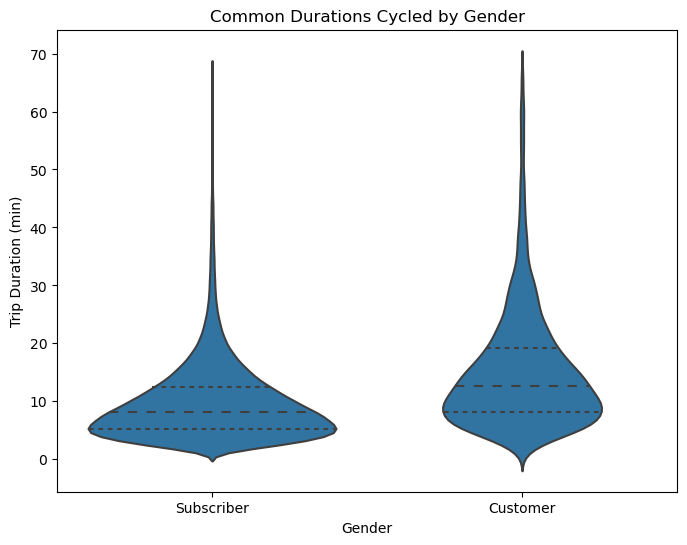

In [8]:
plt.figure(figsize = [8,6])
#show user type vs duration in violin plot
sb.violinplot(data = Bike_clean,
               x = 'user_type',y='duration_min',
               color = sb.color_palette()[0],inner='quartile');
plt.title("Common Durations Cycled by Gender");
plt.xlabel("Gender");
plt.ylabel("Trip Duration (min)");
plt.savefig("Images/Trip duration By Customer type.jpg");

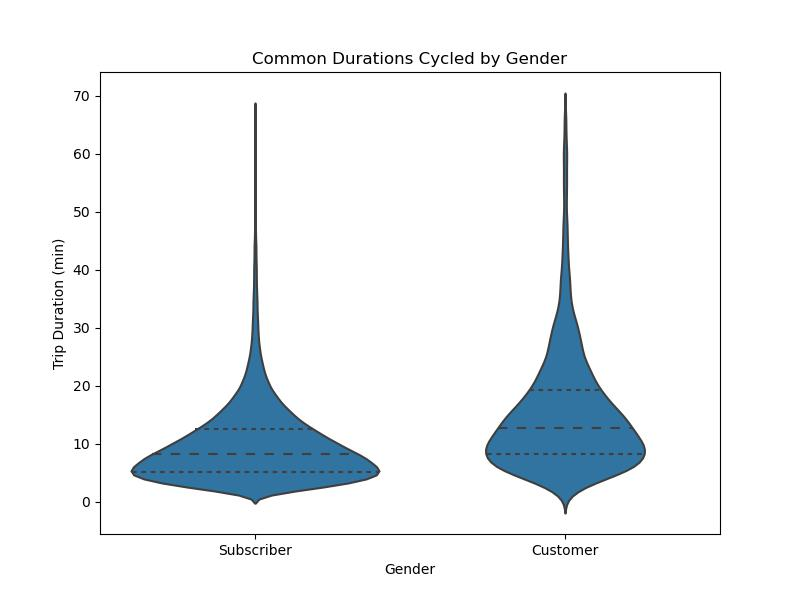

## Age vs Trip Duration/Distance by different Customer types

**How are the duration of the trip and the distance traveled proportioned among the age groups and user types?**

> * Subscribers are more likely to travel between 500 and 1500 m for 4 to 8 minutes and are between 25 and 35 years old 

> * Customers are more likely to travel between 1000 and 2000 m for 4 to 16 minutes and are between 25 and 35 years old



Note:
* Outliers have been removed from this chart.
* the age axis ends at 80 years.





<Figure size 800x600 with 0 Axes>

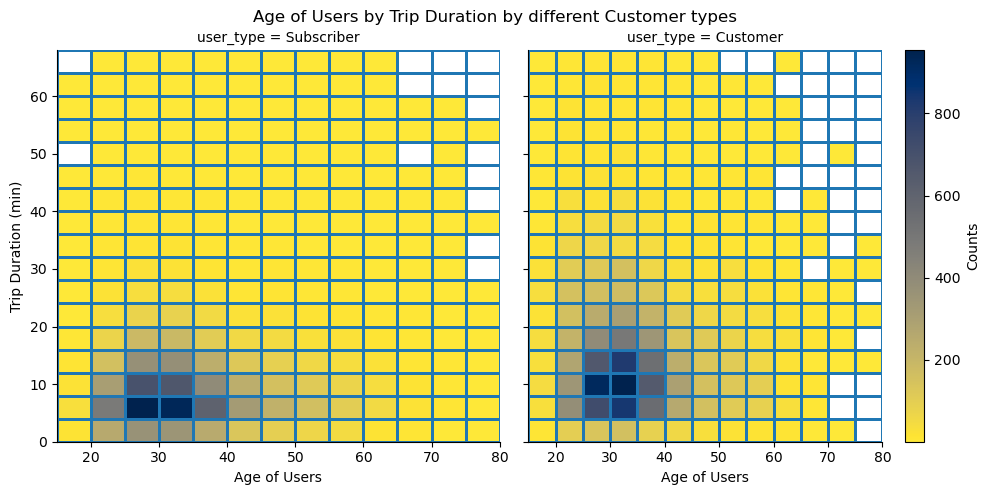

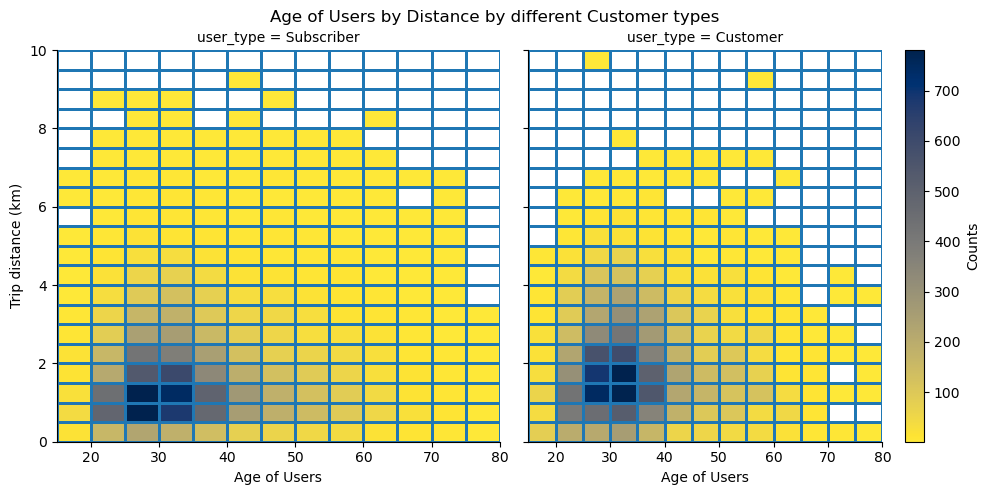

In [11]:
#plot 2D histogram showing counts of duration in min vs Year of birth vs Customer type
plt.figure(figsize = [8,6]);
xbin = np.arange(15, 79+5, 5)
ybin = np.arange(0, 72, 4)
#set grid size
grid = sb.FacetGrid(data = Bike_clean, col = 'user_type',height=5)
grid.map(plt.hist2d, 'age','duration_min',cmin=0.5,cmap = 'cividis_r',bins=[xbin, ybin]);
plt.colorbar().set_label('Counts');

plt.subplots_adjust(top=0.9)
grid.set_ylabels("Trip Duration (min)");
grid.set_xlabels("Age of Users");
grid.fig.suptitle("Age of Users by Trip Duration by different Customer types");


#plot 2D histogram showing counts of distances vs Year of birth vs Customer type
xbin = np.arange(15, 79+5, 5)
ybin = np.arange(0, 10 + 0.5, 0.5)
#set grid size
grid = sb.FacetGrid(data = Bike_clean, col = 'user_type',height=5)
grid.map(plt.hist2d, 'age','trip_km',cmin=0.5,cmap = 'cividis_r',bins=[xbin, ybin]);
plt.colorbar().set_label('Counts');

plt.subplots_adjust(top=0.9)
grid.set_ylabels("Trip distance (km)");
grid.set_xlabels("Age of Users");
grid.fig.suptitle("Age of Users by Distance by different Customer types");
plt.savefig("Images/Age of Users by Trip Duration by different Customer types.jpg");

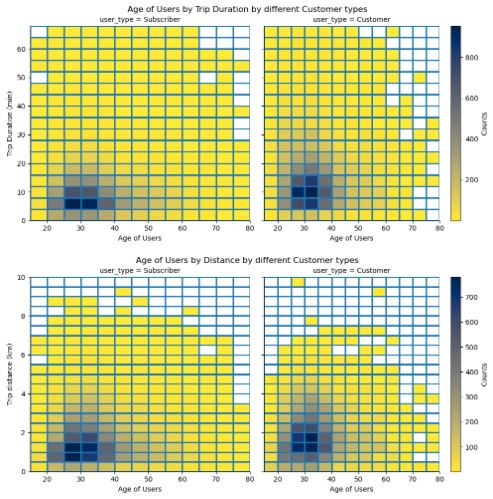

# Summary
* The significant typical usage scenario of GoBike is that people ride to work on weekdays and return home after work, within a distance of 4-16 minutes.

* Subscribers usually use GoBike for commuting, which leads to a decrease in trip frequency on weekends.

* On weekends, there are more incidental customers who travel longer distances on GoBike.

* Customer usage patterns do not differ significantly between weekdays and weekends.

* Most users are between 25 and 35 years old, where there are slightly more Subscribers than Customers

* Subscribers are more likely to travel between 500 and 1500 meters for 4 to 8 minutes, while customers are more likely to travel between 1000 and 2000 meters for 4 to 16 minutes,